# Exploration of original cases

In this notebook we explore the characteristics of the original artificial cases datasets. We aim to answer the following questions:
- How many cases are there?
- How long are they?
- How many unique tokens are there?
- Are all of they structured in the same way?

We also have some metadata about the cases containing the MeSH terms in it. We will explore the distribution of these terms in the cases.

In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt

In [2]:
filename = "data/hfccr_v4/final_en/txt/25350173.txt"
content = open(filename, "r").read()

content

'A 64-year-old female lifelong smoker with no previous cardiac history presented with a 4-day history of dyspnoea on minimal exertion (New York Heart Association class III). Electrocardiography showed broad complex monophasic ventricular tachycardia (VT) and troponin T was elevated. She was treated initially with intravenous amiodarone and adenosine with no sustained effect.\n\nTransthoracic echocardiography showed a severely dilated left ventricle (LV) with a large aneurysm and severely impaired ventricular function. The ejection fraction was less than 10%. Coronary angiography showed a long segment of moderate to severe disease in the left coronary system and a small right coronary artery with no flow limiting disease. Recurrent intermittent episodes of VT became persistent and intractable. Direct current cardioversion was attempted on at least 20 separate occasions, resulting in only transient amelioration of arrhythmia. Percutaneous coronary intervention was undertaken successfully

# Data Exploration

## Amount of data

In [3]:
n_cc = len(os.listdir("data/hfccr_v4/final_en/txt/"))
print("There are {} clinical cases".format(n_cc))

There are 1000 clinical cases


In [4]:
def extract_txt(path, filename):
    total_path = os.path.join(path, filename)
    return filename, open(total_path, "r").read()

main_path = "data/hfccr_v4/final_en/txt/"
filename = "25350173.txt"

def files_to_df(path, extensions=["txt"]):
    files = [x for x in os.listdir(path) if x.split(".")[-1] in extensions]
    data = [extract_txt(path, f) for f in files]
    return pd.DataFrame(data, columns=["filename", "text"])

df = files_to_df(main_path)

In [5]:
df.head()

,filename,text
0,29997384.txt,"A 25-year-old nulliparous white woman, 36 week..."
1,34152792.txt,A 68-year-old man with history of hypertension...
2,30946343.txt,A 50-year-old man was admitted to our hospital...
3,29434126.txt,A 35-year-old Japanese man was emergently admi...
4,30478956.txt,Patient was a 51‐year‐old woman who had been d...


In [17]:
df["n_char"] = df["text"].str.len()
df["n_words"] = df["text"].str.split("\n|\s").str.len()
df.head()

,filename,text,n_char,n_words
0,29997384.txt,"A 25-year-old nulliparous white woman, 36 week...",1956,285
1,34152792.txt,A 68-year-old man with history of hypertension...,4244,635
2,30946343.txt,A 50-year-old man was admitted to our hospital...,4472,661
3,29434126.txt,A 35-year-old Japanese man was emergently admi...,2919,431
4,30478956.txt,Patient was a 51‐year‐old woman who had been d...,2505,352


Text(0.5, 1.0, 'Number of words in clinical cases')

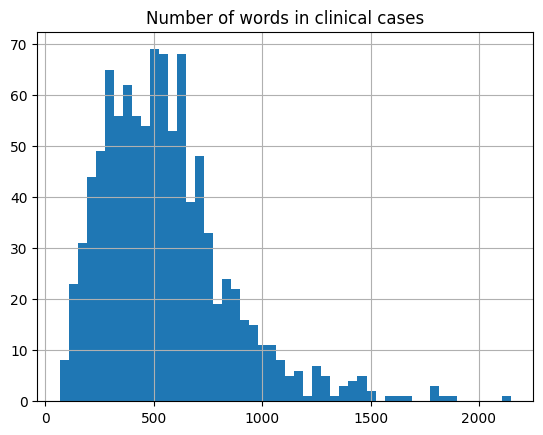

In [18]:
df["n_words"].hist(bins=50)
plt.title("Number of words in clinical cases")

In [19]:
df.describe()

,n_char,n_words
count,1000.000000,1000.000000
mean,3731.179000,552.612000
std,1991.746719,294.424107
min,445.000000,67.000000
25%,2272.500000,336.000000
50%,3467.500000,517.000000
75%,4663.250000,697.000000
max,14524.000000,2147.000000


In [8]:
long_docs = df[df["n_words"] > 1500]

for i, row in long_docs.iterrows():
    print(row["filename"])
    print(row["text"])
    print("\n\n")

33544806.txt
Clinical history

Four years before the admission described in this paper, a 13-year-old male patient, known to have idiopathic biventricular dilated cardiomyopathy, was registered in our Emergency Institute for Cardiovascular Diseases and Transplantation. He was included on the waiting list for heart transplantation. After two years, his condition worsened and presented the clinical picture of cardiogenic shock. At that time, he was urgently hospitalized, intubated and ventilated, with extracorporeal membrane oxygenation (ECMO) back-up. As the creatinine level was slightly elevated, he also needed renal support. A cf-LVAD was implanted at another clinic.

In the early postoperative phase, the pump’s power consumption increased. This was an indicator of possible pump thrombosis. Unfractionated heparin and systemic thrombolysis with tissue plasminogen activator (tPA) was carried out. As the pump function did not improve, it was replaced with another pump six days after LVAD

# Metadata exploration

In [ ]:
metadata_path = "data/hfccr_v4/final_en/metadata"
df_meta = files_to_df(metadata_path)
df_meta["terms"] = df_meta["text"].str.split("\n")
df_meta = df_meta.explode("terms")
df_meta["terms"] = df_meta["terms"].str.replace("MH  - ", "")
df_meta.drop(columns="text", inplace=True)

print(f"Total number of MeSH terms: {df_meta.shape}")
print("\nTop 20 most frequent terms")
print(df_meta.terms.value_counts().sort_values(ascending=False).head(20).to_markdown())

Total number of MeSH terms: (10592, 2)

Top 20 most frequent terms
| terms                      |   count |
|:---------------------------|--------:|
| Humans                     |     996 |
| Male                       |     505 |
| Female                     |     413 |
| Middle Aged                |     298 |
| Aged                       |     257 |
| Adult                      |     227 |
| Treatment Outcome          |     216 |
| Echocardiography           |      99 |
| *Heart-Assist Devices      |      94 |
| *Heart Failure             |      89 |
| Stroke Volume              |      74 |
| Aged, 80 and over          |      71 |
| Diagnosis, Differential    |      63 |
| Fatal Outcome              |      61 |
| Electrocardiography        |      55 |
| Ventricular Function, Left |      50 |
| Pregnancy                  |      49 |
| *Heart Failure/etiology    |      45 |
| SARS-CoV-2                 |      45 |
| Acute Disease              |      44 |


In [41]:
ls_male = df_meta[df_meta["terms"].str.lower() == "male"]["filename"].unique()
print(f"There are {len(ls_male)} files containing Male")
print(df_meta[df_meta["filename"].isin(ls_male)].terms.value_counts().sort_values(ascending=False)[:20].to_markdown())

There are 505 files containing Male
| terms                      |   count |
|:---------------------------|--------:|
| Male                       |     505 |
| Humans                     |     505 |
| Middle Aged                |     203 |
| Aged                       |     178 |
| Treatment Outcome          |     119 |
| Adult                      |     116 |
| Female                     |      75 |
| *Heart-Assist Devices      |      59 |
| Echocardiography           |      53 |
| Aged, 80 and over          |      42 |
| Fatal Outcome              |      39 |
| Stroke Volume              |      38 |
| *Heart Failure             |      37 |
| Diagnosis, Differential    |      30 |
| SARS-CoV-2                 |      28 |
| Acute Disease              |      27 |
| Ventricular Function, Left |      25 |
| Electrocardiography        |      24 |
| Adolescent                 |      24 |
| Child                      |      23 |


In [40]:
ls_female = df_meta[df_meta["terms"].str.lower() == "female"]["filename"].unique()
print(f"There are {len(ls_female)} files containing Female")
print(df_meta[df_meta["filename"].isin(ls_female)].terms.value_counts().sort_values(ascending=False)[:20].to_markdown())

There are 413 files containing Female
| terms                      |   count |
|:---------------------------|--------:|
| Humans                     |     413 |
| Female                     |     413 |
| Middle Aged                |     142 |
| Adult                      |     132 |
| Aged                       |     121 |
| Treatment Outcome          |      95 |
| Male                       |      75 |
| Pregnancy                  |      49 |
| Echocardiography           |      48 |
| Stroke Volume              |      38 |
| Diagnosis, Differential    |      36 |
| Aged, 80 and over          |      35 |
| *Heart-Assist Devices      |      30 |
| Fatal Outcome              |      27 |
| Ventricular Function, Left |      27 |
| Electrocardiography        |      27 |
| Peripartum Period          |      21 |
| *Heart Failure/etiology    |      20 |
| *Heart Failure             |      20 |
| Heart Failure/*etiology    |      18 |
